<a href="https://colab.research.google.com/github/SarraLKSC/CIFAR10_with_Tensorflow/blob/master/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR10**


This notebook is a solution to the CIFAR10 image classification

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# **Load the data**
**CIFAR10** is an image dataset available on the keras API which mean we can easily load it directly from **keras.datasets** with the **load_data()** method that automatically splits data into trainset and test set.

The images are of size 32x32 and colored (RGB representation). 
The trainset and the testset contain 50000 and 10000 images respectively.



In [0]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()
class_names=['airplane' ,'automobile','bird' ,'cat','deer','dog' ,'frog' ,'horse','ship' ,'truck']

In [12]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#**visualize the data**

This is a  ship


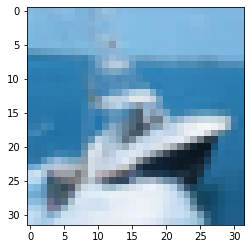

In [13]:
#ploting a random image
plt.imshow(x_train[8])
print('This is a ',class_names[int(y_train[int(8)])])

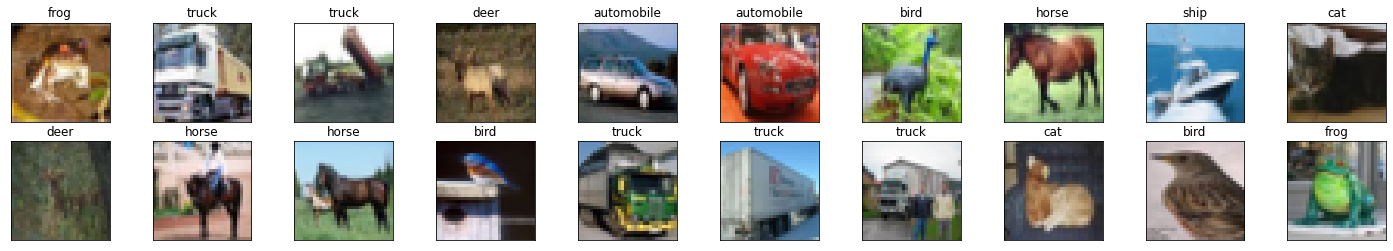

In [4]:
#ploting a set of images with their labels
import numpy as np
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(x_train[idx])
    ax.set_title(class_names[int(y_train[int(idx)])])

#**Normalize the data**
The images are represented according to the RGB politic which means that each channel of the image is a matrix made out of pixels and each pixels holds a value included in the [0,255] interval.However it is better for our network to use values between 0 and 1 so we will be doing a normalization.

In [0]:
#doing it to the trainset
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_train/=255
#same for the testset
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_test=x_test.astype('float32')
x_test/=255

# **Create our model**
Now that our data is loaded, normalized and ready to use we can create our CNN.
This model's architecture is pretty simple it has 3 set of Conv,Maxpool layers to extract the features out of the images.After that comes droupout layer to prevent overfitting, followed by a flatten layer and two dense layers for the classification.  

In [0]:
network=tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu,input_shape=(32,32,3)),
                             tf.keras.layers.MaxPooling2D((2,2),strides=2),
                             tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2),strides=2),
                             tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256,activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

# **Compile our model**

In [0]:
network.compile(optimizer='Adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='true'),
                metrics=['accuracy'])

In [8]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0

#**Train our model**

In [9]:
hist=network.fit(x_train,y_train,shuffle='true',epochs=25)

Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1071 - accuracy: 0.3459
Epoch 2/25
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9957 - accuracy: 0.4618
Epoch 3/25
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9406 - accuracy: 0.5171
Epoch 4/25
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9105 - accuracy: 0.5474
Epoch 5/25
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8846 - accuracy: 0.5740
Epoch 6/25
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8681 - accuracy: 0.5907
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8559 - accuracy: 0.6015
Epoch 8/25
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8424 - accuracy: 0.6162
Epoch 9/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8383 - accuracy: 0.6194
Epoch 10/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.825

In [10]:
network.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8255 - accuracy: 0.6321


[1.8255174160003662, 0.632099986076355]

#**Conclusion**
The model trained for 25 epochs,however it only hit 68% accuracy in training and 63% in test( which shows that our model is not overfitting).Althought it is an okey percentage, an online article stated that it was possible to get up to 80% accuracy using other model architecture such as VGG3.
As a result I will be trying to solve the CIFAR10 classification using another architecture to compare the outcomes.